## Neural Nets
- The new hotness.
- Not so mysterious!
- - not really like the human brain
- - not magical
- - they work by implicitly making a general and powerful assumption about their input

In [0]:
!pip install git+https://github.com/ComputeCanada/ml-workshop-helper.git

  Cloning https://github.com/ComputeCanada/ml-workshop-helper.git to /tmp/pip-req-build-gn2vur8o
  Running command git clone -q https://github.com/ComputeCanada/ml-workshop-helper.git /tmp/pip-req-build-gn2vur8o
  Created wheel for ml-helper: filename=ml_helper-1.0.1556912907-cp36-none-any.whl size=143094 sha256=12669686e7bb8b5a4cebe75ad570b3d6e6e23ccd52216cfded14f2358c9788c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-185y5wfe/wheels/8f/bf/91/772626f0f6a131228a4dfe5d7bdddb478d1f209e771500888f
Successfully built ml-helper


In [0]:
# neural nets using a different library ecosystem
import keras
import keras.layers as kl

Using TensorFlow backend.


In [0]:
# MNIST is the "generic toy dataset" of choice for deep learning experiments
from keras.datasets import mnist
(X_tr, y_tr), (X_v, y_v) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


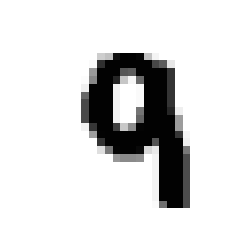

In [0]:
# Let's see what this data looks like:
import matplotlib.pyplot as plt
import numpy.random as npr
import numpy as np
plt.imshow(X_tr[npr.randint(X_tr.shape[0])], cmap="Greys")
plt.axis('off');

Higher resolution digits, nice!

In [0]:
# do one-hot encoding. Take labels of the form 1, 3, 6 into index-encoded
# arrays like [0, 1, 0...]. [0, 0, 0, 1, 0...], etc.
from keras.utils import to_categorical
Y_tr = to_categorical(y_tr)
Y_v = to_categorical(y_v)

# otherwise normalization would do integer rounding: we don't want that!
X_tr = X_tr.astype(np.float64)
X_v = X_v.astype(np.float64)

Neural nets work best with normalized data.

Normalization subtracts the mean and divides by the standard deviation.
It's often applied "featurewise", i.e. each pixel is normalized relative to the
pixels in the same location across images

In MNIST, because some pixels are almost always 0, normalizing them would lead to value blowup. We normalize by the global average instead.

**Exercise**: how should normalization happen with the separate training and validation sets?

In [0]:
M = X_tr.mean()
S = X_tr.std()
    
X_tr -= M
X_tr /= S
X_v -= M
X_v /= S

# the first dimension is the number of samples
print(X_tr.shape)

(60000, 28, 28)


In [0]:
# our first model will be a basic Fully Connected neural net
m = keras.Sequential()
m.add(kl.Flatten())
m.add(kl.Dense(32, activation='relu'))
m.add(kl.Dense(32, activation='relu'))
# "softmax" is a nonlinarity that scales its vector input so that it sums to 1
# thus allowing for (mathematically iffy, but practical) interpretation as a vector of probabilities
m.add(kl.Dense(Y_tr.shape[1], activation='softmax'))

**Exercise**: why do we need the Flatten() call?

In [0]:
# deep learning models are very computationally intensive, and need to be compiled
# and optimized for good performance
print("Compiling model...")
m.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print("Fitting model...")
m.fit(X_tr, Y_tr, epochs=5, batch_size=128, validation_data=(X_v, Y_v));

Compiling model...

Fitting model...



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 2s 38us/step - loss: 0.3860 - categorical_accuracy: 0.8832 - val_loss: 0.2151 - val_categorical_accuracy: 0.9347
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1764 - categorical_accuracy: 0.9477 - val_loss: 0.1801 - val_categorical_accuracy: 0.9466
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1374 - categorical_accuracy: 0.9593 - val_loss: 0.1405 - val_categorical_accuracy: 0.9585
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1159 - categorical_accuracy: 0.9655 - val_loss: 0.1245 - val_categorical_accuracy: 0.9633
Epoch 5/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1026 - categorical_accuracy: 0.9700 - val_loss: 

**Exercise**: think about why convolutional neural nets are a better fit for natural images. What properties of physical reality do they exploit better?

## Coding Exercise
- implement a simple convolutional neural network
- refer to the example above and the Keras layers API.
- you will want to use the Conv2D layer described here: https://keras.io/layers/convolutional/

In [0]:
# Implement your advanced AI here
# Use Sequential and the same X as in the example